<a href="https://colab.research.google.com/github/adali981/ProgrammingAssignment2/blob/master/new_Nathura2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pwd ~/storage/naturha-micro19

4 run separte

151375

152061

152661

152406 è quello in comunione con la Di Gennaro (progetto Nathura) per il quale abbiamo mandato i DNA estratti



In [0]:
#import sequence
qiime tools import \
  --type 'SampleData[PairedEndSequencesWithQuality]' \
  --input-path ~/storage/naturha-micro19/151375/FASTQ \
  --input-format CasavaOneEightSingleLanePerSampleDirFmt \
  --output-path nathura_micro19_151375.qza

qiime tools import \
  --type 'SampleData[PairedEndSequencesWithQuality]' \
  --input-path ~/storage/naturha-micro19/152061/reads \
  --input-format CasavaOneEightSingleLanePerSampleDirFmt \
  --output-path nathura_micro19_152061.qza

qiime tools import \
  --type 'SampleData[PairedEndSequencesWithQuality]' \
  --input-path ~/storage/naturha-micro19/152661/FASTQ \
  --input-format CasavaOneEightSingleLanePerSampleDirFmt \
  --output-path nathura_micro19_152661.qza

qiime tools import \
  --type 'SampleData[PairedEndSequencesWithQuality]' \
  --input-path ~/storage/naturha-micro19/152406 \
  --input-format CasavaOneEightSingleLanePerSampleDirFmt \
  --output-path nathura_micro19_152406.qza

In [0]:
qiime demux summarize \
 --i-data nathura_micro19_151375.qza \
 --o-visualization demux_nathura_micro19_151375.qzv

qiime demux summarize \
 --i-data nathura_micro19_152061.qza \
 --o-visualization demux_nathura_micro19_152061.qzv

qiime demux summarize \
 --i-data nathura_micro19_152661.qza \
 --o-visualization demux_nathura_micro19_152661.qzv

qiime demux summarize \
 --i-data nathura_micro19_152406.qza \
 --o-visualization demux_nathura_micro19_152406.qzv

In [0]:

qiime dada2 denoise-paired \
  --i-demultiplexed-seqs nathura_micro19_151375.qza \
  --p-trim-left-f 24 \
  --p-trim-left-r 20 \
  --p-trunc-len-f 280 \
  --p-trunc-len-r 240 \
  --p-n-threads 14 \
  --o-table table_nathura_micro19_151375.qza \
  --o-representative-sequences rep-seqs_nathura_micro19_151375.qza \
  --o-denoising-stats denoising-stats_nathura_micro19_151375.qza


qiime dada2 denoise-paired \
  --i-demultiplexed-seqs nathura_micro19_152061.qza \
  --p-trim-left-f 24 \
  --p-trim-left-r 20 \
  --p-trunc-len-f 280 \
  --p-trunc-len-r 240 \
  --p-n-threads 14 \
  --o-table table_nathura_micro19_152061.qza \
  --o-representative-sequences rep-seqs_nathura_micro19_152061.qza \
  --o-denoising-stats denoising-stats_nathura_micro19_152061.qza



qiime dada2 denoise-paired \
  --i-demultiplexed-seqs nathura_micro19_152661.qza \
  --p-trim-left-f 24 \
  --p-trim-left-r 20 \
  --p-trunc-len-f 280 \
  --p-trunc-len-r 240 \
  --p-n-threads 14 \
  --o-table table_nathura_micro19_152661.qza \
  --o-representative-sequences rep-seqs_nathura_micro19_152661.qza \
  --o-denoising-stats denoising-stats_nathura_micro19_152661.qza \
  --verbose

qiime dada2 denoise-paired \
  --i-demultiplexed-seqs nathura_micro19_152406.qza \
  --p-trim-left-f 24 \
  --p-trim-left-r 20 \
  --p-trunc-len-f 280 \
  --p-trunc-len-r 240 \
  --p-n-threads 20 \
  --o-table table_nathura_micro19_152406.qza \
  --o-representative-sequences rep-seqs_nathura_micro19_152406.qza \
  --o-denoising-stats denoising-stats_nathura_micro19_152406.qza \
  --verbose

In [0]:
qiime feature-table merge  \
  --i-tables table_nathura_micro19_151375.qza  \
  --i-tables table_nathura_micro19_152061.qza   \
  --i-tables table_nathura_micro19_152661.qza  \
  --i-tables table_nathura_micro19_152406.qza  \
  --o-merged-table nathura_micro19.qza


In [0]:
qiime feature-table merge-seqs \
  --i-data rep-seqs_nathura_micro19_151375.qza \
  --i-data rep-seqs_nathura_micro19_152061.qza \
  --i-data rep-seqs_nathura_micro19_152661.qza \
  --i-data rep-seqs_nathura_micro19_152406.qza \
  --o-merged-data rep-seqs_nathura_micro19.qza

In [0]:
qiime feature-table summarize \
  --i-table nathura_micro19.qza \
  --o-visualization nathura_micro19.qzv 




###filter 10x

qiime feature-table filter-features \
  --i-table nathura_micro19.qza \
  --p-min-frequency 10 \
  --o-filtered-table nathura_micro19_10x.qza

qiime feature-table filter-seqs \
  --i-data rep-seqs_nathura_micro19.qza \
  --i-table nathura_micro19_10x.qza \
  --o-filtered-data rep-seqs_nathura_micro19_10x.qza 

qiime feature-table summarize \
  --i-table nathura_micro19_10x.qza \
  --o-visualization nathura_micro19_10x.qzv 

###filter 100x

qiime feature-table filter-features \
  --i-table nathura_micro19.qza \
  --p-min-frequency 100 \
  --o-filtered-table nathura_micro19_100x.qza

qiime feature-table filter-seqs \
  --i-data rep-seqs_nathura_micro19.qza \
  --i-table nathura_micro19_100x.qza \
  --o-filtered-data rep-seqs_nathura_micro19_100x.qza 

qiime metadata tabulate \
  --m-input-file taxonomy_nathura_micro19_151375.qza \
  --o-visualization taxonomy_nathura_micro19_151375.qzv


In [0]:
export TMPDIR=/home/zooplantlab/tmp

qiime tools import \
  --type FeatureData[Taxonomy] \
  --input-path ~/storage/database_taxonomic_assignment/SILVA_132_QIIME_release/taxonomy/16S_only/99/taxonomy_7_levels.txt \
  --input-format HeaderlessTSVTaxonomyFormat \
  --output-path ~/DB_ref/taxonomy_7_levels.qza

#import ref-seq
qiime tools import \
  --input-path ~/storage/database_taxonomic_assignment/SILVA_132_QIIME_release/rep_set/rep_set_16S_only/99/silva_132_99_16S.fna \
  --output-path ~/DB_ref/silva_132_99_16S.qza \
  --type FeatureData[Sequence]

##vsearch 00:05
qiime feature-classifier classify-consensus-vsearch \
	--i-query rep-seqs_nathura_micro19_10x.qza \
	--i-reference-reads ~/DB_ref/silva_132_99_16S.qza \
	--i-reference-taxonomy ~/DB_ref/taxonomy_7_levels.qza \
	--p-threads 20 \
  --verbose \
	--o-classification taxonomy_nathura2019_132vsearch.qza


##vsearch 00:28
qiime feature-classifier classify-consensus-vsearch \
	--i-query rep-seqs_nathura_micro19_100x.qza \
	--i-reference-reads ~/DB_ref/silva_132_99_16S.qza \
	--i-reference-taxonomy ~/DB_ref/taxonomy_7_levels.qza \
	--p-threads 14 \
  --verbose \
	--o-classification taxonomy_nathura2019_132vsearch_100x.qza

Matching query sequences: 8880 of 8881 (99.99%)

#confidence 0.7
#qiime feature-classifier classify-sklearn \
 # --i-classifier ~/storage/database_taxonomic_assignment/silva-132-99-nb-classifier.qza \
 # --i-reads rep-seqs_nathura_micro19_10x.qza  \
#  --p-n-jobs 20 \
  #--o-classification taxonomy_nathura_micro19.qza

qiime taxa barplot \
  --i-table nathura_micro19_100x.qza \
  --i-taxonomy taxonomy_nathura2019_132vsearch_100x.qza \
  --m-metadata-file map_nathura_micro19.tsv \
  --o-visualization taxa-bar-plots_nathura_micro19_100x.qzv

qiime metadata tabulate \
  --m-input-file taxonomy_nathura2019_132vsearch_100x.qza \
  --m-input-file rep-seqs_nathura_micro19_100x.qza \
  --o-visualization taxonomy_nathura_micro19_rep_set.qzv

qiime feature-table tabulate-seqs \
  --i-data rep-seqs_nathura_micro19_100x.qza \
  --i-data taxonomy_nathura2019_132vsearch_100x.qza \
  --o-visualization annotated_rep-set_nathura_micro19.qzv


## New taxonomy 138 SILVA




In [0]:
qiime feature-classifier classify-consensus-vsearch \
	--i-query rep-seqs_nathura_micro19_10x.qza \
	--i-reference-reads ~/DB_ref/Bacteria_SILVA_138_SSURef_NR99.qza \
	--i-reference-taxonomy ~/DB_ref/Bacteria_taxonomy_SILVA_138_SSURef_NR99.qza \
	--p-threads 22 \
  --verbose \
	--o-classification taxonomy_nathura2019_138vsearch_10x.qza


#623122066 nt in 432023 seqs, min 1200, max 4000, avg 1442

qiime taxa barplot \
  --i-table nathura_micro19_10x.qza \
  --i-taxonomy taxonomy_nathura2019_138vsearch_10x.qza \
  --m-metadata-file map_nathura_ABCD.tsv \
  --o-visualization taxa-bar-plots_nathura_micro19_10x_ABCD_138.qzv



##create taxonomy file with id number

In [0]:
qiime tools export --input-path taxonomy_nathura2019_138vsearch_10x.qza --output-path taxonomy_nathura2019_138vsearch_10x.tsv


import pandas as pd

dftax_nat = pd.read_csv('taxonomy_nathura2019_138vsearch_10x.tsv', sep='\t', header=0)

dftax_nat = df.reset_index()
dftax_nat.columns[0] = 'New_ID'
dftax_nat['New_ID'] = dftax_nat.index + 001
dftax_nat['tax_ann']=df['taxonomy'].astype(str)+'_'+df['New_ID']

#Analisi di Gennaro
 A = DiGennaro
 
 B = DiGennaro
 
 D =DiGennaro
 
 C= Fem2

In [0]:
#filter only samples A-B-D

qiime feature-table filter-samples \
  --i-table nathura_micro19_100x.qza \
  --m-metadata-file map_nathura_micro19.tsv \
  --p-where "Owner='DiGennaro'" \
  --o-filtered-table ABD_nathura_micro19.qza

#remove sample 331562F324588

echo SampleID > samples-to-keep.tsv
echo 331562F324588 >> samples-to-keep.tsv

qiime feature-table filter-samples \
  --i-table ABD_nathura_micro19.qza \
  --m-metadata-file samples-to-keep.tsv \
  --p-exclude-ids \
  --o-filtered-table ABD_nathura_micro19_noNS.qza

qiime feature-table summarize \
  --m-sample-metadata-file map_nathura_micro19.tsv \
  --i-table ABD_nathura_micro19_noNS.qza \
  --o-visualization ABD_nathura_micro19_100x.qzv 




In [0]:
qiime taxa barplot \
  --i-table ABD_nathura_micro19_noNS.qza \
  --i-taxonomy taxonomy_nathura2019_132vsearch_100x.qza \
  --m-metadata-file map_nathura_micro19.tsv \
  --o-visualization taxa-bar-plots_nathura2019_100x_ABD.qzv

#Diversity Analisys

In [0]:
qiime phylogeny align-to-tree-mafft-fasttree \
  --i-sequences rep-seqs_nathura_micro19_100x.qza \
  --o-alignment aligned-rep-seqs_NathMicro19.qza \
  --o-masked-alignment masked-aligned-rep-seqs_NathMicro19.qza \
  --o-tree unrooted-tree_NathMicro19.qza \
  --o-rooted-tree rooted-tree_NathMicro19.qza


qiime diversity core-metrics-phylogenetic \
  --i-phylogeny rooted-tree_NathMicro19.qza \
  --i-table ABD_nathura_micro19_noNS.qza \
  --p-sampling-depth 18000 \
  --m-metadata-file map_nathura_micro19_DiGE.tsv \
  --output-dir core-metrics-results_phylo_nathura19

  qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results_phylo_nathura19/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file map_nathura_micro19_DiGE.tsv \
  --m-metadata-column Time_Groups \
  --o-visualization core-metrics-results_phylo_nathura19/unweighted-unifrac-Time_Groups-significance.qzv \
  --p-pairwise

    qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results_phylo_nathura19/weighted_unifrac_distance_matrix.qza \
  --m-metadata-file map_nathura_micro19_DiGE.tsv \
  --m-metadata-column Time_Groups \
  --o-visualization core-metrics-results_phylo_nathura19/weighted-unifrac-Time_Groups-significance.qzv \
  --p-pairwise

##longitudinal test 
Creation of sub-objects 

AB (two tratment state)

AD (1 treated vs control)

BD (2 treated vs control)



In [0]:
#AB
qiime feature-table filter-samples \
  --i-table ABD_nathura_micro19_noNS.qza \
  --m-metadata-file map_nathura_micro19.tsv \
  --p-where "Groups_tr IN ('A','B')" \
  --o-filtered-table AB_nathura_micro19.qza

In [0]:
#AD
qiime feature-table filter-samples \
  --i-table ABD_nathura_micro19_noNS.qza \
  --m-metadata-file map_nathura_micro19.tsv \
  --p-where "Groups_tr IN ('A','D')" \
  --o-filtered-table AD_nathura_micro19.qza

In [0]:
#BD
qiime feature-table filter-samples \
  --i-table ABD_nathura_micro19_noNS.qza \
  --m-metadata-file map_nathura_micro19.tsv \
  --p-where "Groups_tr IN ('B','D')" \
  --o-filtered-table BD_nathura_micro19.qza

In [0]:
qiime diversity core-metrics-phylogenetic \
  --i-phylogeny rooted-tree_NathMicro19.qza \
  --i-table AB_nathura_micro19.qza \
  --p-sampling-depth 30000 \
  --m-metadata-file map_nathura_micro19_DiGE.tsv \
  --output-dir core-metrics-results_phylo_nathura19_AB

In [0]:
qiime diversity core-metrics-phylogenetic \
  --i-phylogeny rooted-tree_NathMicro19.qza \
  --i-table AD_nathura_micro19.qza \
  --p-sampling-depth 30000 \
  --m-metadata-file map_nathura_micro19_DiGE.tsv \
  --output-dir core-metrics-results_phylo_nathura19_AD

In [0]:
qiime diversity core-metrics-phylogenetic \
  --i-phylogeny rooted-tree_NathMicro19.qza \
  --i-table BD_nathura_micro19.qza \
  --p-sampling-depth 30000 \
  --m-metadata-file map_nathura_micro19_DiGE.tsv \
  --output-dir core-metrics-results_phylo_nathura19_BD

## General longitudinal test

### Pairwise distance longitudinal

In [0]:
##ABD

qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results_phylo_nathura19/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-distances_nathura19_ABD_01.qzv

In [0]:
##AB

qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results_phylo_nathura19_AB/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-distances_nathura19_AB_01.qzv


In [0]:
##AD
qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results_phylo_nathura19_AD/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-distances_nathura19_AD_01.qzv

In [0]:
##BD
qiime longitudinal pairwise-distances \
  --i-distance-matrix core-metrics-results_phylo_nathura19_BD/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-distances_nathura19_BD_01.qzv

### Pairwise difference longitudinal

In [0]:
##ABD
qiime longitudinal pairwise-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/shannon_vector.qza \
  --p-metric shannon \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-differences_ABD.qzv

In [0]:
qiime longitudinal pairwise-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/shannon_vector.qza \
  --p-metric shannon \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 2 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-differences_ABD_02.qzv

In [0]:
##AD
qiime longitudinal pairwise-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19_AD/shannon_vector.qza \
  --p-metric shannon \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-differences_AD.qzv

I dati sembrano indicare che si mantenga una stabilità maggiore nel trattatti rispetto al controllo.
come se il prebiotico o la fibra non aumentasse la biodiversità ma la rendesse stabile. Queste metriche però non stimano se c'è stato uno shift di taxa all'interno delle comunità. quindi la variazione è solo in termini di variazioni di ESV senza considerare un possibile replacement in rapporto 1=1

quanto l'informazione filogenetica può migliorare l'informazione?





In [0]:
##ABD t0-t28
qiime longitudinal pairwise-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/faith_pd_vector.qza \
  --p-metric faith_pd \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 1 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-differences_ABD_01_faith.qzv

pairwise-differences_ABD_01_faith.qzv

introducendo informazione filogenetica emerge segnale 
BD significaticamente diversi
AB no
AD si

rispetto t0 vs t28


In [0]:
##ABD t0-t56
qiime longitudinal pairwise-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/faith_pd_vector.qza \
  --p-metric faith_pd \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 0 \
  --p-state-2 2 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-differences_ABD_02_faith.qzv

In [0]:
##ABD t28-t56
qiime longitudinal pairwise-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/faith_pd_vector.qza \
  --p-metric faith_pd \
  --p-group-column Groups \
  --p-state-column Time_numeric \
  --p-state-1 1 \
  --p-state-2 2 \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-visualization pairwise-differences_ABD_12_faith.qzv

T0-T28
A=B
A=/ D
B=/ D

solo tempo
A==
B==
D==

####

T0-T56
A=B
A=/D
B= D (ma al limite) 

A=/
B=/
D==

####
T28-T56

A=B
A=D
B=D

A==
B==
D=/


Sembra tornare con quello visto nei volatility test

abbozzo considerazione:
la variazione maggiore è tra B e D tra tempo T0 e T28
esiste una variazione simile tra A e D per lo stesso tempo ma di minore intensità.

una volta raggiunto il t28 sembra esserci una stabilizzazione

la variazione in termini di biodiversità è più intensa se si considera il gruppo D. questo potrebbe essere un0altra prova indiretta di una maggior stabilità data dall'assunzione del prebiotico.

## Change some features for heatmap (colors) - change name for feature (replace with taxonomy

In [0]:
qiime tools export --input-path ABD_nathura_micro19_noNS.qza --output-path ABD_nathura_micro19_noNS.tsv
qiime tools export --input-path taxonomy_nathura2019_132vsearch_100x.qza --output-path taxonomy_nathura2019_132vsearch_100x.tsv


qiime tools import \
  --type FeatureData[Taxonomy] \
  --input-path taxonomy_naturha2019_132vsearch_100x_clean.tsv \
  --input-format HeaderlessTSVTaxonomyFormat \
  --output-path taxonomy_naturha2019_132vsearch_100x_clean.qza


qiime taxa collapse \
    --i-table ABD_nathura_micro19_noNS.qza \
    --i-taxonomy taxonomy_naturha2019_132vsearch_100x_clean.qza \
    --p-level 7 \
    --o-collapsed-table ABD_100x_collapsed_D7.qza


qiime feature-table summarize \
  --m-sample-metadata-file map_nathura_Dige.tsv \
  --i-table ABD_100x_collapsed_D7.qza \
  --o-visualization ABD_100x_collapsed_D7.qzv


In [0]:
#AB
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Groups IN ('A','B')" \
  --o-filtered-table AB_nathura_micro19_D7.qza

 qiime longitudinal maturity-index \
  --i-table AB_nathura_micro19_D7.qza \
  --m-metadata-file map_nathura_Dige_AB.tsv  \
  --p-state-column Time_numeric \
  --p-group-by Groups \
  --p-individual-id-column studyid \
  --p-control B \
  --p-test-size 0.4 \
  --p-stratify \
  --p-random-state 1010101 \
  --output-dir maturity_nathura_taxa_D7_AB


In [0]:
#AD
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Groups IN ('A','D')" \
  --o-filtered-table AD_nathura_micro19_D7.qza

  qiime longitudinal maturity-index \
  --i-table AD_nathura_micro19_D7.qza \
  --m-metadata-file map_nathura_Dige_AD.tsv  \
  --p-state-column Time_numeric \
  --p-group-by Groups \
  --p-individual-id-column studyid \
  --p-control D \
  --p-test-size 0.4 \
  --p-stratify \
  --p-random-state 1010101 \
  --output-dir maturity_nathura_taxa_D7_AD

In [0]:
#BD
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Groups IN ('B','D')" \
  --o-filtered-table BD_nathura_micro19_D7.qza

qiime longitudinal maturity-index \
  --i-table BD_nathura_micro19_D7.qza \
  --m-metadata-file map_nathura_Dige_BD.tsv  \
  --p-state-column Time_numeric \
  --p-group-by Groups \
  --p-individual-id-column studyid \
  --p-control D \
  --p-test-size 0.4 \
  --p-stratify \
  --p-random-state 1010101 \
  --output-dir maturity_nathura_taxa_D7_BD



###MAZ (Maturity index prediction)

In [0]:
qiime longitudinal maturity-index \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv  \
  --p-state-column Time_numeric \
  --p-group-by Groups \
  --p-individual-id-column studyid \
  --p-control D \
  --p-test-size 0.4 \
  --p-stratify \
  --p-random-state 1010101 \
  --output-dir maturity_nathura_taxa_D7

### Volatility analysis using FAith


In [0]:
qiime longitudinal volatility \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/faith_pd_vector.qza \
  --p-default-metric faith_pd \
  --p-state-column Time_numeric \
  --p-individual-id-column studyid \
  --o-visualization volatility_faith_pd_ABD.qzv

In [0]:
qiime longitudinal first-differences \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-file core-metrics-results_phylo_nathura19/faith_pd_vector.qza \
  --p-state-column Time_numeric \
  --p-metric faith_pd  \
  --p-individual-id-column studyid \
  --p-replicate-handling random \
  --o-first-differences faith_pd-first-differences_ABD.qza

In [0]:
qiime longitudinal feature-volatility \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-state-column Time_numeric \
  --p-individual-id-column studyid \
  --p-n-estimators 10 \
  --p-random-state 17 \
  --output-dir ABD_100D7_feat_volatility

In [0]:
qiime longitudinal feature-volatility \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-state-column Time_numeric \
  --p-individual-id-column studyid \
  --p-n-estimators 10 \
  --p-random-state 17 \
  --output-dir ABD_100D7_feat_volatility

# Heatmap A- B- D for time 

too much time

In [0]:
#A
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Groups='A'" \
  --o-filtered-table A_nathura_micro19.qza

  



In [0]:
#B
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Groups IN ('B')" \
  --o-filtered-table B_nathura_micro19.qza


  

In [0]:
#D
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D7.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Groups IN ('D')" \
  --o-filtered-table D_nathura_micro19.qza

  

#Maturity test with all the data


In [0]:
qiime feature-table filter-samples \
  --i-table nathura_micro19_10x.qza  \
  --m-metadata-file map_nathura_ABCD.tsv \
  --p-exclude "Individual IN ('51C')" \
  --o-filtered-table nathura_micro19_10x_clean_SP.qza 

#SP= sample problems


qiime feature-table summarize \
  --m-sample-metadata-file map_nathura_ABCD.tsv \
  --i-table nathura_micro19_10x_clean_SP.qza \
  --o-visualization nathura_micro19_10x_clean_SP.qzv


qiime longitudinal maturity-index \
  --i-table nathura_micro19_10x.qza \
  --m-metadata-file map_nathura_ABCD.tsv  \
  --p-state-column Time_numeric \
  --p-group-by Groups \
  --p-individual-id-column studyid \
  --p-control D \
  --p-test-size 0.4 \
  --p-stratify \
  --p-random-state 1010101 \
  --output-dir maturity_nathura_taxa_D7_10x_ABCD

##plot Graph

- firmicutes/bacteriodetes +test
- heatmap lactobacillus
- heatmap bifidobacterium
- per i generi del file "suggestions" fare istogrammi del delta per ogni gruppo.
- akkermatia istogrammi variazione

- core microbiome pazienti per gruppo e variazione.




In [0]:
#use collapsed table to genus level

qiime taxa collapse \
    --i-table ABD_nathura_micro19_noNS.qza \
    --i-taxonomy taxonomy_naturha2019_132vsearch_100x_clean.qza \
    --p-level 6 \
    --o-collapsed-table ABD_100x_collapsed_D6.qza


qiime feature-table summarize \
  --m-sample-metadata-file map_nathura_Dige.tsv \
  --i-table ABD_100x_collapsed_D6.qza \
  --o-visualization ABD_100x_collapsed_D6.qzv


qiime feature-table group \
  --i-table ABD_100x_collapsed_D6.qza \
  --p-axis sample \
  --m-metadata-file map_nathura_Dige.tsv \
  --m-metadata-column Time_Groups \
  --p-mode median-ceiling \
  --o-grouped-table ABD_100x_collapsed_D6_timegroups.qza




#collapsed to phyla 
qiime taxa collapse \
    --i-table ABD_nathura_micro19_noNS.qza \
    --i-taxonomy taxonomy_naturha2019_132vsearch_100x_clean.qza \
    --p-level 2 \
    --o-collapsed-table ABD_100x_collapsed_D2.qza


qiime feature-table summarize \
  --m-sample-metadata-file map_nathura_Dige.tsv \
  --i-table ABD_100x_collapsed_D2.qza \
  --o-visualization ABD_100x_collapsed_D2.qzv

  biom convert -i ABD_feature-table_D2.biom -o ABD_100x_collapsed_D2.tsv --to-tsv

##venn core diagram 
-calculate core t0 for each group (1 file)

-venn of t0

-calculate core for each time_group (9 file)

-venn diagram of each core for each group


In [0]:
#generate core at genus level for all sequences
qiime feature-table core-features \
    --i-table ABD_100x_collapsed_D6_groups.qza \
    --o-visualization core_ABD_100x_collapsed_D6_groups.qzv


#select
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D6.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Time_Groups IN ('T0_A')" \
  --o-filtered-table T0_A_nathura_micro19.qza

qiime feature-table summarize \
  --i-table T0_A_nathura_micro19.qza \
  --o-visualization T0_A_nathura_micro19.qzv

qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D6_groups.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Time_Groups IN ('T0_B')" \
  --o-filtered-table T0_B_nathura_micro19.qza

qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D6_groups.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Time_Groups IN ('T0_D')" \
  --o-filtered-table T0_D_nathura_micro19.qza


##core genera T0
qiime feature-table filter-samples \
  --i-table ABD_100x_collapsed_D6.qza \
  --m-metadata-file map_nathura_Dige.tsv \
  --p-where "Time IN ('T0')" \
  --o-filtered-table T0_nathura_micro19.qza


qiime feature-table core-features \
    --i-table T0_nathura_micro19.qza \
    --o-visualization core_ABD_T0_100x_collapsed_D6_groups.qzv



biom convert -i feature-tableT0A.biom -o T0_A_nathura_micro19.tsv --to-tsv
biom convert -i feature-tableT0B.biom -o T0_B_nathura_micro19.tsv --to-tsv
biom convert -i feature-tableT0C.biom -o T0_C_nathura_micro19.tsv --to-tsv




###Heatmap 
D_5__Blautia
D_5__Bifidobacterium
D_5__Akkermansia
D_5__Faecalibacterium
D_5__Sutterella
D_5__Alistipes
D_5__Bacteroides
D_5__Subdoligranulum
D_5__Lactobacillus


ABD_100x_collapsed_D6.qza


In [0]:
qiime taxa filter-table \
  --i-table ABD_nathura_micro19_noNS.qza \
  --i-taxonomy taxonomy_nathura2019_132vsearch_100x.qza \
  --p-include D_5__Blautia,D_5__Bifidobacterium,D_5__Akkermansia,D_5__Faecalibacterium,D_5__Sutterella,D_5__Alistipes,D_5__Bacteroides,D_5__Subdoligranulum,D_5__Lactobacillus \
  --o-filtered-table table-variation_high_import.qza

  qiime taxa collapse \
    --i-table table-variation_high_import.qza \
    --i-taxonomy taxonomy_nathura2019_132vsearch_100x.qza \
    --p-level 6 \
    --o-collapsed-table ABD_variation_high_import.qza


#heatmap of assolute count for each patient
  qiime feature-table heatmap \
    --i-table ABD_variation_high_import.qza \
    --m-metadata-file map_nathura_Dige.tsv \
     --p-cluster features \
    --m-metadata-column Time_Groups \
    --o-visualization heatmap_viz_high_import_D5_clsuter_features.qzv

##heatmap of differential distribution of specific genus

In [0]:
##
qiime tools export \
  --input-path ABD_variation_high_import.qza  \
  --output-path ABD_variation_high_import

biom convert -i feature_table.biom -o ABD_variation_high_import.tsv --to-tsv



##all
ABD_100x_collapsed_D6.qzv

qiime feature-table relative-frequency \
–i-table ABD_100x_collapsed_D6.qza \
–o-relative-frequency-table ABD_100x_collapsed_D6.qza

qiime tools export \
  --input-path ABD_100x_collapsed_D6.qza \
  --output-path ABD_100x_collapsed_D6_RA

cd ABD_100x_collapsed_D6_RA

biom convert -i feature_table.biom -o ABD_100x_collapsed_D6_RA.tsv --to-tsv


qiime tools export \
  --input-path ABD_nathura_micro19_noNS.qza \
  --output-path ABD_nathura_micro19_noNS

cd ABD_nathura_micro19_noNS

biom convert -i feature_table.biom -o ABD_nathura_micro19_noNS.tsv --to-tsv




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


#transform dataframe export and control bacteria names
df_gen = pd.read_csv('ABD_nathura_micro19_noNS.tsv', sep='\t', header=0)
df_gen_trans=df_gen.set_index('OTU_ID').T
res_P = df_gen_trans.div(df_gen_trans.sum(axis=1), axis=0)

res_P.to_csv(r'naturha-micro19.tsv')

##add label first column (why disapear?)
res_PM_a= pd.read_csv('naturha-micro19_fix.tsv', header=0)
##add metadata
meta_res= pd.read_csv('meta_res.tsv', sep='\t', header=0)
res_PM= pd.merge(res_PM, meta_res, on='SampleID')


In [0]:
#check column names
print(res_PM.columns)

#create subset to test 
A=res_PM[res_PM['Groups']=='A']
At0=A[A['Time']=='T0']
At28=A[A['Time']=='T28']
At56=A[A['Time']=='T56']
At0_t28=res_PM[res_PM['Time'].isin(['T0', 'T28'])]
At28_t56=res_PM[res_PM['Time'].isin(['T28', 'T56'])]
At0_t56=res_PM[res_PM['Time'].isin(['T0', 'T56'])]

B=res_PM[res_PM['Groups']=='B']
Bt0=B[B['Time']=='T0']
Bt28=B[B['Time']=='T28']
Bt56=B[B['Time']=='T56']
B=res_PM[res_PM['Groups']=='B']
Bt0_t28=res_PM[res_PM['Time'].isin(['T0', 'T28'])]
Bt28_t56=res_PM[res_PM['Time'].isin(['T28', 'T56'])]
Bt0_t56=res_PM[res_PM['Time'].isin(['T0', 'T56'])]

D=res_PM[res_PM['Groups']=='D']
Dt0=D[D['Time']=='T0']
Dt28=D[D['Time']=='T28']
Dt56=D[D['Time']=='T56']
D=res_PM[res_PM['Groups']=='D']
Dt0_t28=res_PM[res_PM['Time'].isin(['T0', 'T28'])]
Dt28_t56=res_PM[res_PM['Time'].isin(['T28', 'T56'])]
Dt0_t56=res_PM[res_PM['Time'].isin(['T0', 'T56'])]

#for loop to test distribution for each couple of time
groupList=[A,B,D]
collist=list(A[A.columns[~A.columns.isin(['SampleID','Groups','Time'])]]) 

#collist= ['Methanobrevibacter_0112']
#print(len(collist))
#t0-t28
resultT028 = pd.DataFrame(columns=['groupS', 'Bacteria', 'pvalue', 'UMann'])
groupn=0
for i in groupList:
  groupn += 1
  print(groupn)
  t1= pd.DataFrame()
  t2=pd.DataFrame()
  t1=i[i['Time']=='T0']
  t2=i[i['Time']=='T28']
  for c in collist:
    if t1[c].sum() > 0:
      foo = stats.mannwhitneyu(t1[c], t2[c])
      resultT028=resultT028.append(pd.Series([groupn, c, foo.pvalue, foo.statistic], index=resultT028.columns ), ignore_index=True)

#t28-t56
resultT2856 = pd.DataFrame(columns=['groupS', 'Bacteria', 'pvalue', 'UMann'])
groupn=0
for i in groupList:
  groupn += 1
  print(groupn)
  t1= pd.DataFrame()
  t2=pd.DataFrame()
  t1=i[i['Time']=='T28']
  t2=i[i['Time']=='T56']
  for c in collist:
    if t1[c].sum() > 0:
      foo = stats.mannwhitneyu(t1[c], t2[c])
      resultT2856=resultT2856.append(pd.Series([groupn, c, foo.pvalue, foo.statistic], index=resultT2856.columns ), ignore_index=True)

#t0-t56
resultT056 = pd.DataFrame(columns=['groupS', 'Bacteria', 'pvalue', 'UMann'])
groupn=0
for i in groupList:
  groupn += 1
  print(groupn)
  t1= pd.DataFrame()
  t2=pd.DataFrame()
  t1=i[i['Time']=='T0']
  t2=i[i['Time']=='T56']
  for c in collist:
    if t1[c].sum() > 0:
      foo = stats.mannwhitneyu(t1[c], t2[c])
      resultT056=resultT056.append(pd.Series([groupn, c, foo.pvalue, foo.statistic], index=resultT056.columns ), ignore_index=True)


In [0]:
#add time column to results dataframe
resultT028['TimeC']='T0T28'
resultT2856['TimeC']='T28T56'
resultT056['TimeC']='T0T56'

#extract significant bacteria
most_imp_t0t28=resultT028.loc[resultT028['pvalue'] <= 0.05]
most_imp_t28t56=resultT2856.loc[resultT2856['pvalue'] <= 0.05]
most_imp_t0t56=resultT056.loc[resultT056['pvalue'] <= 0.05]

In [0]:
frames=[most_imp_t0t28, most_imp_t28t56,most_imp_t0t56]
resultsig = pd.concat(frames)
resultsig.to_csv(r'resultsig.tsv')


In [0]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
resultingD= pd.read_csv('/content/drive/My Drive/Lavoro/Naturha-microbiota/resultsig.tsv', header=0)


In [0]:
resultingD["Gtime"] = resultingD["groupS"].map(str) + resultingD["TimeC"]

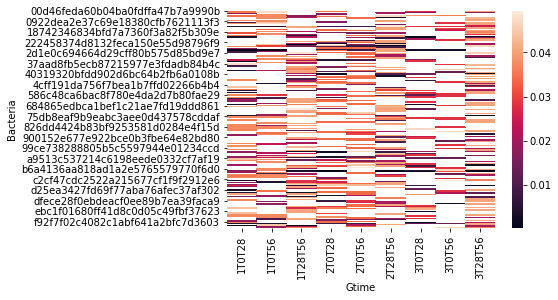

In [7]:
pivot = resultingD.pivot(index='Bacteria', columns='Gtime', values='pvalue')
ax = sns.heatmap(pivot)
plt.show()


In [20]:
##ad taxonomy
taxamap= pd.read_csv('/content/drive/My Drive/Lavoro/Naturha-microbiota/taxamap.tsv', sep='\t', header=0)
resultingDTaxm = pd.merge(resultingD, taxamap, on='Bacteria')

resultingDTaxm.head(1)

,Unnamed: 0,groupS,Bacteria,pvalue,UMann,TimeC,Gtime,Taxon
0,4,1,00f731378c090ebb3d925530cae09ee6,0.035247,248.0,T0T28,1T0T28,Ruminiclostridium 5.uncultured bacterium_0025


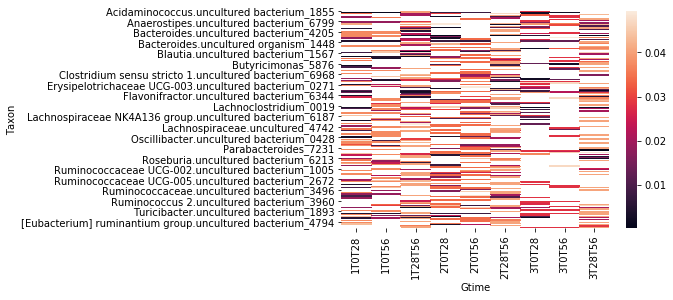

In [21]:
pivotT = resultingDTaxm.pivot(index='Taxon', columns='Gtime', values='pvalue')
ax = sns.heatmap(pivotT)
plt.show()